# Zooming on Cluster n°0
Understanding what it means, how it evolves

In [1]:
#libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df1 = pd.read_excel("df_2020_with_clusters.xlsx")

In [3]:
df = df1

In [4]:
df["cluster"].value_counts()

1    5747
0    3054
2     833
Name: cluster, dtype: int64

In [5]:
df.columns

Index(['X_uuid', 'population_group', 'district', 'governorate', 'weight',
       'year', 'critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'quintile', 'cluster', 'cluster_nb_0', 'cluster_nb_1',
       'cluster_nb_2'],
      dtype='object')

#### First looking at 2020

weighted, the cluster n°0 only accounts for 4.8% of the total population

In [6]:
df0 = df[df["cluster_nb_0"]==1]
df0["weightedcluster"] = df0["cluster_nb_0"]*df0["weight"]
df0["weightedcluster"].sum() #weighted
df0["cluster_nb_0"].sum() #unweighted

print("the proportion of the dataset of 2020 that is categorized in the cluster 0 " + str(df0["cluster_nb_0"].sum()/9636*100))
print("the WEIGHTED proportion of the dataset of 2020 that is categorized in the cluster 0 " + str(df0["weightedcluster"].sum()/9636*100))

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_25328/1142374374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["weightedcluster"] = df0["cluster_nb_0"]*df0["weight"]


470.8852308902607

833

the proportion of the dataset of 2020 that is categorized in the cluster 0 8.644665836446658
the WEIGHTED proportion of the dataset of 2020 that is categorized in the cluster 0 4.886729253738696


In [7]:
dfa = df[df["cluster_nb_1"]==1]
dfa["weightedcluster"] = dfa["cluster_nb_1"]*dfa["weight"]
dfa["weightedcluster"].sum()
dfa["cluster_nb_1"].sum()

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_25328/3907589482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["weightedcluster"] = dfa["cluster_nb_1"]*dfa["weight"]


1246.559969411573

3054

In [8]:
df2 = df[df["cluster_nb_2"]==1]
df2["weightedcluster"] = df2["cluster_nb_2"]*df2["weight"]
df2["weightedcluster"].sum()
df2["cluster_nb_2"].sum()

C:\Users\ROXANN~1\AppData\Local\Temp/ipykernel_25328/2116635288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["weightedcluster"] = df2["cluster_nb_2"]*df2["weight"]


7916.554799698164

5747

### Looking at the distribution of cluster 0 across geography and population (weighted)

In [9]:
df["weightedcluster0"] = df["cluster_nb_0"]*df["weight"]
df["weightedcluster1"] = df["cluster_nb_1"]*df["weight"]
df["weightedcluster2"] = df["cluster_nb_2"]*df["weight"]

% des gens de ce cluster par governorate

In [10]:
df0a = df0[["governorate", "population_group","district", "cluster_nb_0", "weightedcluster"]]
df0ageo = df0a.groupby("governorate").sum()
df0ageo["proportion_cluster0"] = df0ageo["weightedcluster"]/(df0ageo["weightedcluster"].sum())*100
#weighting sample for full sample
dfax = pd.DataFrame((df.groupby("governorate").sum()["weight"])/(df["weight"].sum())*100).rename(columns={"weight":"proportion_full_sample"})
df0ageo.merge(dfax, left_index=True, right_index=True)

,cluster_nb_0,weightedcluster,proportion_cluster0,proportion_full_sample
governorate,,,,
al.anbar,28,11.885519,2.524080,25.548272
al.najaf,5,1.339980,0.284566,0.192295
al.qadissiya,1,0.056869,0.012077,0.035418
al.sulaymaniyah,150,35.140047,7.462550,2.186284
babil,2,0.752146,0.159730,0.234216
baghdad,54,12.837777,2.726307,1.863424
diyala,125,45.268727,9.613537,4.762262
duhok,121,55.866268,11.864094,5.324741
erbil,66,57.163050,12.139487,3.584178


The geographical distribution within the cluster is not always comparable to the geographical distribution of the full sample
- large under representation of al anbar, ninewa
- large over representation of erbil, salah al din

Al anbar: returnees = 2% of cluster0, but 25% of dataset. for Ninewa, 12% vs 30% --> the two largest groups of the dataset are not present in the cluster 0. Instead cluster 0 focuses on out-of-camps IDP in Erbil and returnees in Salah al din 

% des gens de ce cluster par groupe

In [11]:
df0a = df0[["governorate", "population_group","district", "cluster_nb_0", "weightedcluster"]]
df0ageo = df0a.groupby(["population_group"]).sum()
df0ageo["proportion_cluster0"] = df0ageo["weightedcluster"]/(df0ageo["weightedcluster"].sum())*100
dfax = pd.DataFrame((df.groupby(["population_group"]).sum()["weight"])/(df["weight"].sum())*100).rename(columns={"weight":"proportion_full_sample"})
df0ageo.merge(dfax, left_index=True, right_index=True)

,cluster_nb_0,weightedcluster,proportion_cluster0,proportion_full_sample
population_group,,,,
idp_in_camp,221,39.950657,8.48416,5.497327
idp_out_camp,440,175.984926,37.37321,17.044454
returnee,172,254.949648,54.14263,77.458219


Over representation of IDP out of camps, under representation of returnees

% des gens de ce cluster par governorate et par groupe

In [12]:
df0a = df0[["governorate", "population_group","district", "cluster_nb_0", "weightedcluster"]]
df0ageo = df0a.groupby(["governorate", "population_group"]).sum()
df0ageo["proportion_cluster0"] = df0ageo["weightedcluster"]/(df0ageo["weightedcluster"].sum())*100
dfax = pd.DataFrame((df.groupby(["governorate", "population_group"]).sum()["weight"])/(df["weight"].sum())*100).rename(columns={"weight":"proportion_full_sample"})
df0ageo.merge(dfax, how="outer", left_index=True, right_index=True)

cluster_nb_0  weightedcluster  \
governorate     population_group                                  
al.anbar        idp_in_camp                5.0         0.583096   
                idp_out_camp               9.0         1.454295   
                returnee                  14.0         9.848128   
al.basrah       idp_out_camp               NaN              NaN   
al.najaf        idp_out_camp               5.0         1.339980   
al.qadissiya    idp_out_camp               1.0         0.056869   
al.sulaymaniyah idp_in_camp               50.0         4.973677   
                idp_out_camp             100.0        30.166370   
babil           idp_out_camp               2.0         0.752146   
baghdad         idp_in_camp                1.0         0.022490   
                idp_out_camp              44.0         5.161751   
                returnee                   9.0         7.653536   
diyala          idp_in_camp               50.0         2.121879   
                idp_out_camp              49.0         7.644466   
                returnee                  26.0        35.502382   
duhok           idp_in_camp               72.0        22.794484   
                idp_out_camp              49.0        33.071783   
erbil           idp_in_camp                NaN              NaN   
                idp_out_camp              66.0        57.163050   
kerbala         idp_in_camp                NaN              NaN   
                idp_out_camp              10.0         3.547071   
kirkuk          idp_in_camp                1.0         0.063966   
                idp_out_camp               1.0         0.965933   
                returnee                   NaN              NaN   
ninewa          idp_in_camp               40.0         9.321280   
                idp_out_camp              57.0        20.518942   
                returnee                  22.0        57.280450   
salah.al.din    idp_in_camp                2.0         0.069785   
                idp_out_camp              41.0        13.923469   
                returnee                 101.0       144.665152   
thi.qar         idp_out_camp               6.0         0.218800   
wassit          idp_out_camp               NaN              NaN   

                                  proportion_cluster0  proportion_full_sample  
governorate     population_group                                               
al.anbar        idp_in_camp                  0.123830                0.148574  
                idp_out_camp                 0.308843                0.414806  
                returnee                     2.091407               24.984893  
al.basrah       idp_out_camp                      NaN                0.028714  
al.najaf        idp_out_camp                 0.284566                0.192295  
al.qadissiya    idp_out_camp                 0.012077                0.035418  
al.sulaymaniyah idp_in_camp                  1.056240                0.251025  
                idp_out_camp                 6.406310                1.935260  
babil           idp_out_camp                 0.159730                0.234216  
baghdad         idp_in_camp                  0.004776                0.019910  
                idp_out_camp                 1.096180                0.480738  
                returnee                     1.625351                1.362776  
diyala          idp_in_camp                  0.450615                0.111055  
                idp_out_camp                 1.623424                0.843218  
                returnee                     7.539498                3.807989  
duhok           idp_in_camp                  4.840773                2.545463  
                idp_out_camp                 7.023321                2.779279  
erbil           idp_in_camp                       NaN                0.287543  
                idp_out_camp                12.139487                3.296635  
kerbala         idp_in_camp                       NaN                0.0103

under representation of
- Al anbar returnees
- Ninewa returnees

Over representation of
- Diyala returnees
- Duhok IDP out of camps
- Erbil IDP out of camps
- Salah Al Din returnees

# Zooming on the 4 most important variables of cluster 0 (weighted)
emergency (=1), fcs_Acceptable (=0), not_attending_formal (=1), imptoved_water_source  (=0)

In [13]:
#resetting everything
df = df1

In [14]:
#creating the weighted variables
cols = ["emergency", "fcs_Acceptable", "not_attending_formal", "imptoved_water_source"]
for col in cols:
    df[col+"_weighted"] = df[col]*df["weight"]

In [15]:
#creating the dataframes
dfa = df[["governorate", "population_group","district", "cluster_nb_0", "weight", 'emergency_weighted',
       'fcs_Acceptable_weighted', 'not_attending_formal_weighted',
       'imptoved_water_source_weighted']]

df0 = df[df["cluster_nb_0"]==1]
df0a = df0[["governorate", "population_group","district", "cluster_nb_0", "weight", 'emergency_weighted',
       'fcs_Acceptable_weighted', 'not_attending_formal_weighted',
       'imptoved_water_source_weighted']]

In [16]:
#grouping the dataframes with 3 different kinds of grouping
#population group
df0_population_group = df0a.groupby(["population_group"]).sum()
dfa_population_group = dfa.groupby(["population_group"]).sum()
#governorate
df0_governorate = df0a.groupby(["governorate"]).sum()
dfa_governorate = dfa.groupby(["governorate"]).sum()
#governorate and populationgroup
df0_govpopgroup = df0a.groupby(["governorate", "population_group"]).sum()
dfa_govpopgroup = dfa.groupby(["governorate", "population_group"]).sum()

In [17]:
#some list definitions
cols = ['emergency_weighted','fcs_Acceptable_weighted', 'not_attending_formal_weighted','imptoved_water_source_weighted']
colorder=["proportion_cluster0_emergency_weighted", "proportion_sample_emergency_weighted", 
          "proportion_cluster0_fcs_Acceptable_weighted","proportion_sample_fcs_Acceptable_weighted", 
         "proportion_cluster0_not_attending_formal_weighted","proportion_sample_not_attending_formal_weighted",
         "proportion_cluster0_imptoved_water_source_weighted","proportion_sample_imptoved_water_source_weighted"]


In [18]:
#no disaggregation
df01 = pd.DataFrame(df0.sum()).transpose()
dfa1 = pd.DataFrame(dfa.sum()).transpose()

for col in cols:
        df01["proportion_cluster0_"+col] = (df01[col]/df01["weight"])*100
        dfa1["proportion_sample_"+col] = (dfa1[col]/dfa1["weight"])*100
        df_population_group = df01.merge(dfa1,how="outer", left_index=True, right_index=True)
df_population_group = df_population_group[colorder]

df_population_group
#note to myself: the reason why these numbers are different from those at the end of the clustering_step2 notebook
#is because here we weight the observations

,proportion_cluster0_emergency_weighted,proportion_sample_emergency_weighted,proportion_cluster0_fcs_Acceptable_weighted,proportion_sample_fcs_Acceptable_weighted,proportion_cluster0_not_attending_formal_weighted,proportion_sample_not_attending_formal_weighted,proportion_cluster0_imptoved_water_source_weighted,proportion_sample_imptoved_water_source_weighted
0,19.906497,9.242298,45.399022,97.329433,18.949816,9.628764,5.265505,5.281135


In [19]:
#by population group
for col in cols:
        df0_population_group["proportion_cluster0_"+col] = (df0_population_group[col]/df0_population_group["weight"])*100
        dfa_population_group["proportion_sample_"+col] = (dfa_population_group[col]/dfa_population_group["weight"])*100
        df_population_group = df0_population_group.merge(dfa_population_group,how="outer", left_index=True, right_index=True)
df_population_group = df_population_group[colorder]

df_population_group

,proportion_cluster0_emergency_weighted,proportion_sample_emergency_weighted,proportion_cluster0_fcs_Acceptable_weighted,proportion_sample_fcs_Acceptable_weighted,proportion_cluster0_not_attending_formal_weighted,proportion_sample_not_attending_formal_weighted,proportion_cluster0_imptoved_water_source_weighted,proportion_sample_imptoved_water_source_weighted
population_group,,,,,,,,
idp_in_camp,5.673996,8.514670,31.808817,94.823141,16.678748,18.177932,4.994591,3.055746
idp_out_camp,22.142508,12.714447,58.116250,95.511189,26.886719,18.509684,3.287799,3.756435
returnee,20.593275,8.529902,38.750247,97.907408,13.827061,7.067796,6.673115,5.774580


Emergency
- higher proportion of emergency for IDP out of camp and returnees (22% vs 12.7% an 20.6% bs 8.5%)
- (lower proportion for idp in camp)

FCS acceptable
- much lower proportoin for all population group

Not attending formal
- Higher proportion for UDP out of camps and returnees
- (lower proportion for IDP in camp)

Improved water source
- only IDP out of camps have lower proportion of improved water source. (but make up for 37% of dataset)

In [20]:
# by governorate
for col in cols:
        df0_governorate["proportion_cluster0_"+col] = (df0_governorate[col]/df0_governorate["weight"])*100
        dfa_governorate["proportion_sample_"+col] = (dfa_governorate[col]/dfa_governorate["weight"])*100
        df_governorate = df0_governorate.merge(dfa_governorate, how="outer",left_index=True, right_index=True)
df_governorate = df_governorate[colorder]

df_governorate

,proportion_cluster0_emergency_weighted,proportion_sample_emergency_weighted,proportion_cluster0_fcs_Acceptable_weighted,proportion_sample_fcs_Acceptable_weighted,proportion_cluster0_not_attending_formal_weighted,proportion_sample_not_attending_formal_weighted,proportion_cluster0_imptoved_water_source_weighted,proportion_sample_imptoved_water_source_weighted
governorate,,,,,,,,
al.anbar,39.234848,14.899518,58.023303,99.797298,4.362286,5.341270,6.306311,0.733210
al.basrah,NaN,9.259259,NaN,100.000000,NaN,3.703704,NaN,0.000000
al.najaf,80.000000,16.243949,100.000000,100.000000,20.000000,6.117651,40.000000,8.008718
al.qadissiya,0.000000,5.000000,100.000000,100.000000,0.000000,5.000000,0.000000,1.666667
al.sulaymaniyah,18.680426,16.363526,36.702107,89.439651,26.686572,22.648608,0.000000,0.000000
babil,100.000000,21.666667,100.000000,100.000000,0.000000,5.000000,0.000000,0.000000
baghdad,19.713621,9.425303,53.775105,96.694422,23.721833,12.961012,17.576966,10.841230
diyala,2.517272,4.542827,88.384786,98.853945,6.625111,8.304385,2.430602,1.866336
duhok,16.314239,12.270483,34.744050,92.893355,17.246254,18.572823,0.888891,0.947037


Acceptable FCS - difference striking for all governorates

In [21]:
# by governorate and population group
for col in cols:
        df0_govpopgroup["proportion_cluster0_"+col] = (df0_govpopgroup[col]/df0_govpopgroup["weight"])*100
        dfa_govpopgroup["proportion_sample_"+col] = (dfa_govpopgroup[col]/dfa_govpopgroup["weight"])*100
        df_govpopgroup = df0_govpopgroup.merge(dfa_govpopgroup, how="outer",left_index=True, right_index=True)
df_govpopgroup = df_govpopgroup[colorder]
        
df_govpopgroup

proportion_cluster0_emergency_weighted  \
governorate     population_group                                           
al.anbar        idp_in_camp                                    14.985711   
                idp_out_camp                                   24.428190   
                returnee                                       42.857143   
al.basrah       idp_out_camp                                         NaN   
al.najaf        idp_out_camp                                   80.000000   
al.qadissiya    idp_out_camp                                    0.000000   
al.sulaymaniyah idp_in_camp                                     4.533132   
                idp_out_camp                                   21.012960   
babil           idp_out_camp                                  100.000000   
baghdad         idp_in_camp                                   100.000000   
                idp_out_camp                                   25.793902   
                returnee                                       15.376988   
diyala          idp_in_camp                                     4.218159   
                idp_out_camp                                   13.735854   
                returnee                                        0.000000   
duhok           idp_in_camp                                     3.565120   
                idp_out_camp                                   25.101475   
erbil           idp_in_camp                                          NaN   
                idp_out_camp                                   17.062665   
kerbala         idp_in_camp                                          NaN   
                idp_out_camp                                   20.000000   
kirkuk          idp_in_camp                                     0.000000   
                idp_out_camp                                  100.000000   
                returnee                                             NaN   
ninewa          idp_in_camp                                    11.042571   
                idp_out_camp                                   16.353379   
                returnee                                       48.548917   
salah.al.din    idp_in_camp                                     0.000000   
                idp_out_camp                                   35.518388   
                returnee                                       13.338343   
thi.qar         idp_out_camp                                   16.666667   
wassit          idp_out_camp                                         NaN   

                                  proportion_sample_emergency_weighted  \
governorate     population_group                                         
al.anbar        idp_in_camp                                  14.181791   
                idp_out_camp                                 10.237772   
                returnee                                     14.981182   
al.basrah       idp_out_camp                                  9.259259   
al.najaf        idp_out_camp                                 16.243949   
al.qadissiya    idp_out_camp                                  5.000000   
al.sulaymaniyah idp_in_camp                                  21.094006   
                idp_out_camp                                 15.749931   
babil           idp_out_camp                                 21.666667   
baghdad         idp_in_camp                                   3.394752   
                idp_out_camp                                 13.513550   
                returnee                                      8.071221   
diyala          idp_in_camp                                   6.807186   
                idp_out_camp                                  7.062885   
                returnee                                      3.918763   
duhok           idp_in_camp                                   6.804172   
                idp_out_camp                                 17.276923   
erbil           idp_in_camp                

IDP out of camps almost systematically worse off for all 5 variables and all governorates

# Following the same approach, but for all other variables of the dataset

In [22]:
#resetting everything again
df = df1

In [23]:
df.columns

Index(['X_uuid', 'population_group', 'district', 'governorate', 'weight',
       'year', 'critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'quintile', 'cluster', 'cluster_nb_0', 'cluster_nb_1',
       'cluster_nb_2', 'weightedcluster0', 'weightedcluster1',
       'weightedcluster2', 'emergency_weighted', 'fcs_Acceptable_weighted',
       'not_attending_formal_weighted', 'imptoved_water_source_weighted'],
      dtype='object')

In [24]:
#creating the weighted variables
cols = ['critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)']
for col in cols:
    df[col+"_weighted"] = df[col]*df["weight"]

In [25]:
df.columns

Index(['X_uuid', 'population_group', 'district', 'governorate', 'weight',
       'year', 'critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)', 'C1', 'C2', 'C3', 'C4',
       'C5', 'quintile', 'cluster', 'cluster_nb_0', 'cluster_nb_1',
       'cluster_nb_2', 'weightedcluster0', 'weightedcluster1',
       'weightedcluster2', 'emergency_weighted', 'fcs_Acceptable_weighted',
       'not_attending_formal_weighted', 'imptoved_water_source_weighted',
       'critical_shelter_weighted', 'stress_weighted', 'crisis_weighted',
       'female_headed_weighted', 'single_headed_weighted',
       'children_workin

In [26]:
#creating the dataframes
dfa = df
df0 = df[df["cluster_nb_0"]==1]
df0a = df0

In [27]:
#grouping the dataframes with 3 different kinds of grouping
#population group
df0_population_group = df0a.groupby(["population_group"]).sum()
dfa_population_group = dfa.groupby(["population_group"]).sum()
#governorate
df0_governorate = df0a.groupby(["governorate"]).sum()
dfa_governorate = dfa.groupby(["governorate"]).sum()
#governorate and populationgroup
df0_govpopgroup = df0a.groupby(["governorate", "population_group"]).sum()
dfa_govpopgroup = dfa.groupby(["governorate", "population_group"]).sum()

In [28]:
#some list definitions
cols = ['emergency_weighted', 'fcs_Acceptable_weighted',
       'not_attending_formal_weighted', 'imptoved_water_source_weighted',
       'critical_shelter_weighted', 'stress_weighted', 'crisis_weighted',
       'female_headed_weighted', 'single_headed_weighted',
       'children_working_weighted', 'ngo_assistance_weighted',
       'child_married_weighted', 'insufficient_amount_water_weighted',
       'fcs_Borderline_weighted', 'fcs_Poor_weighted',
       'hhs_Little to no hunger in the household (0-1)_weighted',
       'hhs_Moderate hunger in the household (2-3)_weighted',
       'hhs_Severe hunger in the household (4-6)_weighted']
colorder=["proportion_cluster0_emergency_weighted", "proportion_sample_emergency_weighted", 
          "proportion_cluster0_fcs_Acceptable_weighted","proportion_sample_fcs_Acceptable_weighted", 
         "proportion_cluster0_not_attending_formal_weighted","proportion_sample_not_attending_formal_weighted",
         "proportion_cluster0_imptoved_water_source_weighted","proportion_sample_imptoved_water_source_weighted",
         "proportion_cluster0_critical_shelter_weighted","proportion_sample_critical_shelter_weighted",
         "proportion_cluster0_stress_weighted","proportion_sample_stress_weighted",
         "proportion_cluster0_crisis_weighted","proportion_sample_crisis_weighted",
         "proportion_cluster0_female_headed_weighted","proportion_sample_female_headed_weighted",
         "proportion_cluster0_single_headed_weighted","proportion_sample_single_headed_weighted",
         "proportion_cluster0_children_working_weighted","proportion_sample_children_working_weighted",
         "proportion_cluster0_ngo_assistance_weighted","proportion_sample_ngo_assistance_weighted",
         "proportion_cluster0_child_married_weighted","proportion_sample_child_married_weighted",
         "proportion_cluster0_insufficient_amount_water_weighted","proportion_sample_insufficient_amount_water_weighted",
         "proportion_cluster0_fcs_Borderline_weighted","proportion_sample_fcs_Borderline_weighted",
         "proportion_cluster0_fcs_Poor_weighted","proportion_sample_fcs_Poor_weighted",
         "proportion_cluster0_hhs_Little to no hunger in the household (0-1)_weighted","proportion_sample_hhs_Little to no hunger in the household (0-1)_weighted",
         "proportion_cluster0_hhs_Moderate hunger in the household (2-3)_weighted","proportion_sample_hhs_Moderate hunger in the household (2-3)_weighted",
         "proportion_cluster0_hhs_Severe hunger in the household (4-6)_weighted","proportion_sample_hhs_Severe hunger in the household (4-6)_weighted"]


In [29]:
#no disaggregation
df01 = pd.DataFrame(df0.sum()).transpose()
dfa1 = pd.DataFrame(dfa.sum()).transpose()

for col in cols:
        df01["proportion_cluster0_"+col] = (df01[col]/df01["weight"])*100
        dfa1["proportion_sample_"+col] = (dfa1[col]/dfa1["weight"])*100
        df_population_group = df01.merge(dfa1,how="outer", left_index=True, right_index=True)
df_population_group = df_population_group[colorder]

df_population_group.transpose()
#note to myself: the reason why these numbers are different from those at the end of the clustering_step2 notebook
#is because here we weight the observations

,0
proportion_cluster0_emergency_weighted,19.906497
proportion_sample_emergency_weighted,9.242298
proportion_cluster0_fcs_Acceptable_weighted,45.399022
proportion_sample_fcs_Acceptable_weighted,97.329433
proportion_cluster0_not_attending_formal_weighted,18.949816
proportion_sample_not_attending_formal_weighted,9.628764
proportion_cluster0_imptoved_water_source_weighted,5.265505
proportion_sample_imptoved_water_source_weighted,5.281135
proportion_cluster0_critical_shelter_weighted,27.284582
proportion_sample_critical_shelter_weighted,10.290908


The HH classified under the cluster0 are worse off in almost all indicators

critical shelter also much worse in cluster0 than in sample.
stress and crisis both higher in cluster0
female and single headed also higher in cluster0
moderate hunger strikingly higher for cluster0 than for sample (where little to no hunger is higher)


In [30]:
#by population group
for col in cols:
        df0_population_group["proportion_cluster0_"+col] = (df0_population_group[col]/df0_population_group["weight"])*100
        dfa_population_group["proportion_sample_"+col] = (dfa_population_group[col]/dfa_population_group["weight"])*100
        df_population_group = df0_population_group.merge(dfa_population_group,how="outer", left_index=True, right_index=True)
df_population_group = df_population_group[colorder]

df_population_group

,proportion_cluster0_emergency_weighted,proportion_sample_emergency_weighted,proportion_cluster0_fcs_Acceptable_weighted,proportion_sample_fcs_Acceptable_weighted,proportion_cluster0_not_attending_formal_weighted,proportion_sample_not_attending_formal_weighted,proportion_cluster0_imptoved_water_source_weighted,proportion_sample_imptoved_water_source_weighted,proportion_cluster0_critical_shelter_weighted,proportion_sample_critical_shelter_weighted,...,proportion_cluster0_fcs_Borderline_weighted,proportion_sample_fcs_Borderline_weighted,proportion_cluster0_fcs_Poor_weighted,proportion_sample_fcs_Poor_weighted,proportion_cluster0_hhs_Little to no hunger in the household (0-1)_weighted,proportion_sample_hhs_Little to no hunger in the household (0-1)_weighted,proportion_cluster0_hhs_Moderate hunger in the household (2-3)_weighted,proportion_sample_hhs_Moderate hunger in the household (2-3)_weighted,proportion_cluster0_hhs_Severe hunger in the household (4-6)_weighted,proportion_sample_hhs_Severe hunger in the household (4-6)_weighted
population_group,,,,,,,,,,,,,,,,,,,,,
idp_in_camp,5.673996,8.514670,31.808817,94.823141,16.678748,18.177932,4.994591,3.055746,100.000000,97.201900,...,67.532237,5.127152,0.658947,0.049707,58.922961,96.901405,38.376245,2.894864,2.700793,0.203731
idp_out_camp,22.142508,12.714447,58.116250,95.511189,26.886719,18.509684,3.287799,3.756435,18.129781,11.236006,...,36.715720,3.934937,5.168030,0.553874,32.134641,92.726660,63.026275,6.754720,4.839084,0.518620
returnee,20.593275,8.529902,38.750247,97.907408,13.827061,7.067796,6.673115,5.774580,22.209378,3.914738,...,48.685030,1.663320,12.564723,0.429273,54.837037,98.457011,45.092312,1.540575,0.070651,0.002414


In [31]:
# by governorate
for col in cols:
        df0_governorate["proportion_cluster0_"+col] = (df0_governorate[col]/df0_governorate["weight"])*100
        dfa_governorate["proportion_sample_"+col] = (dfa_governorate[col]/dfa_governorate["weight"])*100
        df_governorate = df0_governorate.merge(dfa_governorate, how="outer",left_index=True, right_index=True)
df_governorate = df_governorate[colorder]

df_governorate

,proportion_cluster0_emergency_weighted,proportion_sample_emergency_weighted,proportion_cluster0_fcs_Acceptable_weighted,proportion_sample_fcs_Acceptable_weighted,proportion_cluster0_not_attending_formal_weighted,proportion_sample_not_attending_formal_weighted,proportion_cluster0_imptoved_water_source_weighted,proportion_sample_imptoved_water_source_weighted,proportion_cluster0_critical_shelter_weighted,proportion_sample_critical_shelter_weighted,...,proportion_cluster0_fcs_Borderline_weighted,proportion_sample_fcs_Borderline_weighted,proportion_cluster0_fcs_Poor_weighted,proportion_sample_fcs_Poor_weighted,proportion_cluster0_hhs_Little to no hunger in the household (0-1)_weighted,proportion_sample_hhs_Little to no hunger in the household (0-1)_weighted,proportion_cluster0_hhs_Moderate hunger in the household (2-3)_weighted,proportion_sample_hhs_Moderate hunger in the household (2-3)_weighted,proportion_cluster0_hhs_Severe hunger in the household (4-6)_weighted,proportion_sample_hhs_Severe hunger in the household (4-6)_weighted
governorate,,,,,,,,,,,,,,,,,,,,,
al.anbar,39.234848,14.899518,58.023303,99.797298,4.362286,5.341270,6.306311,0.733210,18.466439,2.217177,...,41.976697,0.202702,0.000000,0.000000,20.546796,99.616327,79.453204,0.383673,0.000000,0.000000
al.basrah,NaN,9.259259,NaN,100.000000,NaN,3.703704,NaN,0.000000,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,100.000000,NaN,0.000000,NaN,0.000000
al.najaf,80.000000,16.243949,100.000000,100.000000,20.000000,6.117651,40.000000,8.008718,20.000000,13.019526,...,0.000000,0.000000,0.000000,0.000000,0.000000,92.766930,100.000000,7.233070,0.000000,0.000000
al.qadissiya,0.000000,5.000000,100.000000,100.000000,0.000000,5.000000,0.000000,1.666667,0.000000,3.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,98.333333,100.000000,1.666667,0.000000,0.000000
al.sulaymaniyah,18.680426,16.363526,36.702107,89.439651,26.686572,22.648608,0.000000,0.000000,14.927386,14.605496,...,55.665680,9.287024,7.632213,1.273326,62.824395,93.797781,33.192569,5.537706,3.983036,0.664513
babil,100.000000,21.666667,100.000000,100.000000,0.000000,5.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,96.666667,100.000000,3.333333,0.000000,0.000000
baghdad,19.713621,9.425303,53.775105,96.694422,23.721833,12.961012,17.576966,10.841230,10.336141,6.881178,...,41.641223,2.977796,4.583672,0.327782,41.305440,95.802707,58.694560,4.197293,0.000000,0.000000
diyala,2.517272,4.542827,88.384786,98.853945,6.625111,8.304385,2.430602,1.866336,11.933128,5.125420,...,11.290505,1.114017,0.324709,0.032038,10.725456,91.191418,89.274544,8.808582,0.000000,0.000000
duhok,16.314239,12.270483,34.744050,92.893355,17.246254,18.572823,0.888891,0.947037,66.441368,61.441379,...,60.742758,6.615140,4.513192,0.491505,47.880584,94.323978,47.304798,5.151690,4.814619,0.524332


# Supervised classification algorithm - KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [33]:
#creating a new variable called "cluster_dummy" which equals 1 when the observation is classified in our group of interest, which
#is the cluster0
df["cluster_dummy"] = 0
df.loc[df.cluster == 0, 'cluster_dummy'] = 1

In [34]:
#features dataset
X = df.drop(["year","X_uuid", "governorate", "district", "weight", "population_group", 'C1', 'C2', 'C3', 'C4',
       'C5', 'quintile', 'cluster', 'cluster_nb_0', 'cluster_nb_1',
       'cluster_nb_2', 'weightedcluster0', 'weightedcluster1',
       'weightedcluster2', 'emergency_weighted', 'fcs_Acceptable_weighted',
       'not_attending_formal_weighted', 'imptoved_water_source_weighted',
       'critical_shelter_weighted', 'stress_weighted', 'crisis_weighted',
       'female_headed_weighted', 'single_headed_weighted',
       'children_working_weighted', 'ngo_assistance_weighted',
       'child_married_weighted', 'insufficient_amount_water_weighted',
       'fcs_Borderline_weighted', 'fcs_Poor_weighted',
       'hhs_Little to no hunger in the household (0-1)_weighted',
       'hhs_Moderate hunger in the household (2-3)_weighted',
       'hhs_Severe hunger in the household (4-6)_weighted', 'cluster_dummy'], axis=1)

In [35]:
#target dataset
y = df[['cluster_dummy']]

In [36]:
#split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
y_train = y_train.to_numpy().ravel() #changing y_train from a 1 column dataframe to a 1d array

In [37]:
X_train.columns

Index(['critical_shelter', 'not_attending_formal', 'stress', 'crisis',
       'emergency', 'female_headed', 'single_headed', 'children_working',
       'ngo_assistance', 'child_married', 'imptoved_water_source',
       'insufficient_amount_water', 'fcs_Acceptable', 'fcs_Borderline',
       'fcs_Poor', 'hhs_Little to no hunger in the household (0-1)',
       'hhs_Moderate hunger in the household (2-3)',
       'hhs_Severe hunger in the household (4-6)'],
      dtype='object')

### Hyperparameter tuning (number of neighbors)

The optimal number of neighbors is 5, for a R2 of above 0.999

In [38]:
#hyperparameter (n_neighbors) tuning
neighbor_options = list(range(2, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for neighbor in neighbor_options:
    nbrs = KNeighborsClassifier(n_neighbors = neighbor)
    nbrs.fit(X_train, y_train)   
    
    score = nbrs.score(X_test, y_test)
    r2_list.append(score)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

(2.0, 24.0)

Text(0.5, 0, 'Number of neighbors')

Text(0, 0.5, 'R2')

Text(0.5, 1.0, 'Model Performance on Test Set')

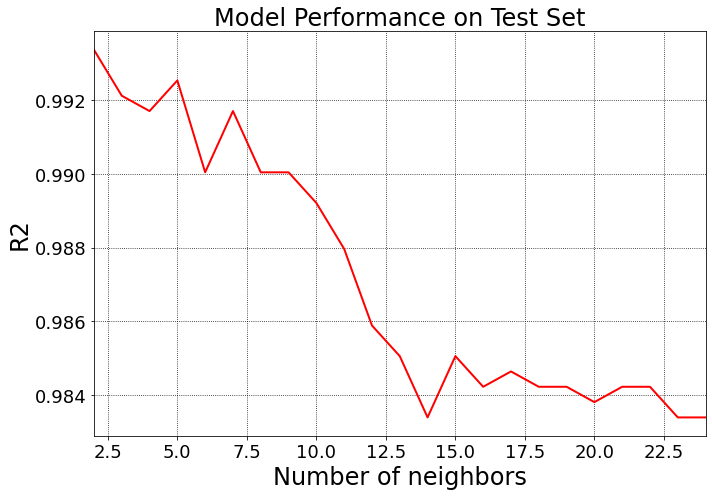

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(neighbor_options,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([2, max(neighbor_options)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Number of neighbors', fontsize = 24)
ax.set_ylabel('R2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

### Implementing the optimal model (n_neighbors=5)

In [40]:
#defining the model
nbrs = KNeighborsClassifier(n_neighbors=5)
#fitting on the training data (2020)
nbrs.fit(X_train, y_train)
# saving some info
distances, indices = nbrs.kneighbors(X_train)

KNeighborsClassifier()

In [41]:
y_pred = nbrs.predict(X_test)
score = nbrs.score(X_test, y_test)
print(score)
#very very very high R2 for this algorithm

0.9925280199252802


In [42]:
pd.DataFrame(data=y_pred).value_counts()
y_test["cluster_dummy"].value_counts()

0    1641
1     768
dtype: int64

0    1625
1     784
Name: cluster_dummy, dtype: int64

In [43]:
cm = confusion_matrix(y_test, y_pred)
#2208 true negative (are negative, and are classified as negative)(here negative means not part of cluster0)
#199 true positive (are positive and classified as positive)
#2 false negatice (is positive but classified as negative)
#0 false positive (is negative but classified as positive)

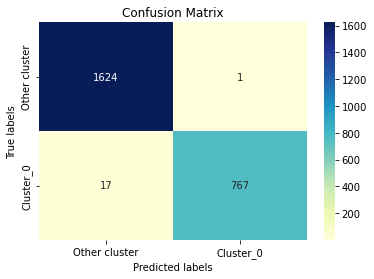

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="YlGnBu");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Other cluster', 'Cluster_0']); ax.yaxis.set_ticklabels(['Other cluster', 'Cluster_0']);

#### Now applying the algorithm to 2021 data

In [45]:
#import the latest dataset
df1 = pd.read_excel("final_clean_v2.xlsx")
#to avoid reloading the dataset everytime I want to clear the Kernel
df = df1.copy()
#dropping population group = host
df.drop(df[df.population_group < "host"].index, inplace=True) #deleting 1170 observations
#selecting only 2021
X_2021 =df[df["year"]!=2020]
#selecting only the features
X_2021_info = X_2021[["year","X_uuid", "governorate", "district", "weight", "population_group"]]
X_2021 = X_2021.drop(["year","X_uuid", "governorate", "district", "weight", "population_group"], axis=1)

In [46]:
y_pred_2021 = nbrs.predict(X_2021)

In [47]:
X_2021["pred_cluster_dummy"] = y_pred_2021

In [48]:
X_2021["pred_cluster_dummy"].value_counts()

0    9886
1    2203
Name: pred_cluster_dummy, dtype: int64

#### Looking in 2021 at the weighted share of HH classified as part of cluster0 (pred_cluster_dummy=1)

In [49]:
X_2021 = X_2021_info.merge(X_2021,how="outer",left_index=True, right_index=True)

In [50]:
X_2021["weighted_pred_cluster_dummy"] = X_2021["pred_cluster_dummy"]*X_2021["weight"]

In [51]:
print("the proportion of the dataset of 2021 that is categorized in the cluster 0 " + str(X_2021["pred_cluster_dummy"].sum()/12089*100))
print("the WEIGHTED proportion of the dataset of 2021 that is categorized in the cluster 0 " + str(X_2021["weighted_pred_cluster_dummy"].sum()/X_2021["weight"].sum()*100))
print("There are" + str(X_2021["pred_cluster_dummy"].sum())+" observations in the 2021 dataset that are categorized as part of the cluster 0, out of 12089")

the proportion of the dataset of 2021 that is categorized in the cluster 0 18.22317809578956
the WEIGHTED proportion of the dataset of 2021 that is categorized in the cluster 0 9.767196220839795
There are2203 observations in the 2021 dataset that are categorized as part of the cluster 0, out of 12089


#### Plotting the evolution of the proportion of HH weighted and unweighted) that categorize as part of cluster0

In [52]:
y_weighted = [4.8867 ,10.1247] #2020, then 2021 weighted proportion
y_unweighted = [8.6446 ,21.59]
x_axis = [2020, 2021]

Text(0, 0.5, 'Proportion of sample categorized as Cluster0')

Text(0.5, 1.0, 'Proportion of the population in cluster 0')

[Text(0, 0, '2020'), Text(1, 0, '2021')]

[Text(0, 3, '4.8867'), Text(0, 3, '10.1247')]

[Text(0, 3, '8.6446'), Text(0, 3, '21.59')]

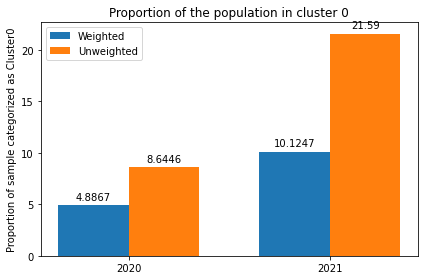

In [53]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["2020", "2021"]
y_weighted = [4.8867 ,10.1247] 
y_unweighted = [8.6446 ,21.59]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_weighted, width, label='Weighted')
rects2 = ax.bar(x + width/2, y_unweighted, width, label='Unweighted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of sample categorized as Cluster0')
ax.set_title('Proportion of the population in cluster 0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()